# Diagnostics: PDA reconstruction

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('/glade/u/home/fengzhu/Github/x4c/docsrc/notebooks')
import numpy as np
import x4c
print(x4c.__version__)


2024.4.16


In [2]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005'
case = x4c.Timeseries(dirpath)

>>> case.root_dir: /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005
>>> case.path_pattern: comp/proc/tseries/month_1/casename.mdl.h_str.vn.timespan.nc
>>> case.grid_dict: {'atm': 'ne16', 'lnd': 'ne16', 'rof': 'ne16', 'ocn': 'g16', 'ice': 'g16'}
>>> case.vars_info created


In [3]:
import pandas as pd

filename = '/glade/work/fengzhu/Projects/MioMIP1/Data_02_28_20_clean_MidMioceneSlab_MAT.csv'
MIDMIO_MAT = pd.read_csv(filename, header=0, sep=',')
MIDMIO_MAT2= MIDMIO_MAT.values[0:-1,:]
MidMioLat=np.asarray(MIDMIO_MAT2[:,0],dtype=np.float64)
MidMioLon=np.asarray(MIDMIO_MAT2[:,1],dtype=np.float64)
MidMioMAT=np.asarray(MIDMIO_MAT2[:,2],dtype=np.float64)
MidMioMATUncert=np.asarray(MIDMIO_MAT2[:,3],dtype=np.float64)

In [4]:
import xarray as xr
import x4c

SNR = 3

recon_tas = xr.load_dataset(f'/glade/work/fengzhu/Projects/MioDA/notebooks/recons/recon_tas_loc10000_SNR{SNR}.nc')['tas']
recon_tas.attrs['units'] = '°C'
recon_tas.attrs['long_name'] = 'Air Surface Temperature'
recon_sst = xr.load_dataset(f'/glade/work/fengzhu/Projects/MioDA/notebooks/recons/recon_sst_loc10000_SNR{SNR}.nc')['sst']
recon_sst.attrs['units'] = '°C'
recon_sst.attrs['long_name'] = 'Sea Surface Temperature'
recon_sst.name = 'SST'

recon_lst = recon_tas.where(np.isnan(recon_sst))
recon_lst.attrs['units'] = '°C'
recon_lst.attrs['long_name'] = 'Land Surface Temperature'
recon_lst.name = 'LST'

In [5]:
case.diags['map:LST:recon'] = recon_lst
case.diags['zm:LST:recon'] = recon_lst.x.zm
case.diags['map:SST:recon'] = recon_sst
case.diags['zm:SST:recon'] = recon_sst.x.zm

>>> case.ds["SSH"] created


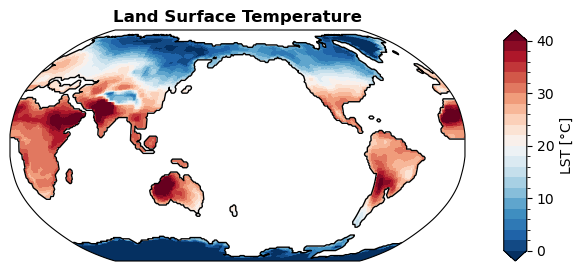

In [6]:
fig, ax = case.plot('map:LST:recon')

Regridding from [1, 13826] to [180, 360]
>>> case.ds["TS"] created
Regridding from [1, 13826] to [180, 360]
>>> case.ds["LANDFRAC"] created
>>> case.diags["zm:LST:ann"] created


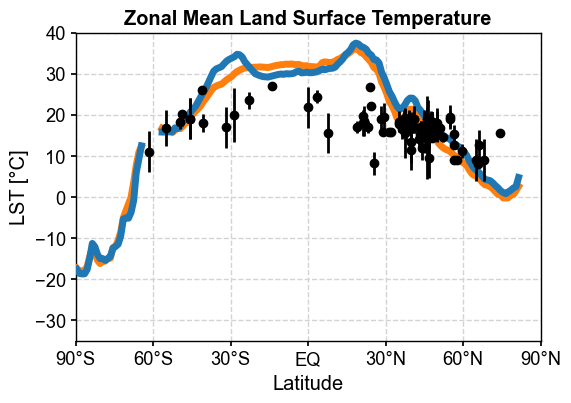

Figure saved at: "figs/zm_LST_ann_compare_model-data-recon.pdf"


In [7]:
x4c.set_style('journal_spines', font_scale=1.2)
case.calc('zm:LST:ann', load_idx=-1)
fig, ax = case.plot('zm:LST:ann', figsize=(6, 4), label='iCESM1.3 854ppm', color='tab:orange', zorder=101, lw=5)
ax = case.plot('zm:LST:recon', label='PDA recon', color='tab:blue', zorder=101, lw=5, ax=ax)

ax.errorbar(MidMioLat, MidMioMAT, yerr=MidMioMATUncert, ls='none', color='k', zorder=102)
ax.plot(MidMioLat, MidMioMAT, marker='o', ls='none', color='k', label='Proxies', zorder=102)
ax.set_title('Zonal Mean Land Surface Temperature', weight='bold')

# ax.legend(frameon=False, loc='lower center')
x4c.showfig(fig)
x4c.savefig(fig, './figs/zm_LST_ann_compare_model-data-recon.pdf')

In [8]:
filename='/glade/work/fengzhu/Projects/MioMIP1/MidMiocene_SST_v2.csv'
MIDMIO_SST = pd.read_csv(filename, header=0, sep=',')
MIDMIO_SST2=MIDMIO_SST.values[:,:]
MidMioSSTLat=np.asarray(MIDMIO_SST2[:,3],dtype=np.float64)
MidMioSST=np.asarray(MIDMIO_SST2[:,1],dtype=np.float64)
MidMioSST_ucert=np.asarray(MIDMIO_SST2[:,2],dtype=np.float64)

In [9]:
MIDMIO_SST

,Site,Mid Miocene SST,Mid Miocene Uncertainty,Mid Miocene Lat,Mid Miocene Lon,Mid Miocene Adjusted,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,DSDP594,23.20,3.00,-48.93,178.21,178.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608Uk37,27.22,3.00,41.51,-23.46,336.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,608Tex86,25.63,8.14,41.55,-23.45,336.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,722,30.74,4.01,15.94,61.43,61.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,730,31.25,4.05,7.33,57.23,57.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,761,28.80,4.00,-23.06,112.79,112.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,806Tex86,30.23,5.00,-2.09,168.89,168.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,846,28.75,3.00,-5.62,-80.77,279.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,850Tex86,27.84,5.00,-2.51,-101.12,258.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,850Uk37,28.33,3.00,-2.51,-101.12,258.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>>> case.ds["TEMP"] created
>>> case.diags["zm:SST:ann"] created


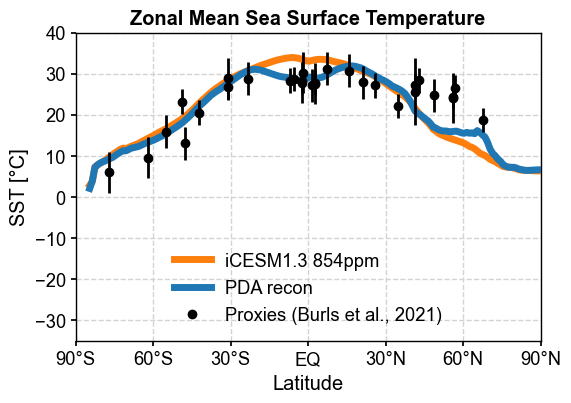

Figure saved at: "figs/zm_SST_ann_compare_model-data-recon.pdf"


In [10]:
x4c.set_style('journal_spines', font_scale=1.2)
case.calc('zm:SST:ann', load_idx=-1)
fig, ax = case.plot('zm:SST:ann', figsize=(6, 4), label='iCESM1.3 854ppm', color='tab:orange', zorder=101, lw=5)
ax = case.plot('zm:SST:recon', label='PDA recon', color='tab:blue', zorder=101, lw=5, ax=ax)

ax.errorbar(MidMioSSTLat, MidMioSST, yerr=MidMioSST_ucert, ls='none', color='k', zorder=102)
ax.plot(MidMioSSTLat, MidMioSST, marker='o', ls='none', color='k', label='Proxies (Burls et al., 2021)', zorder=102)
ax.set_title('Zonal Mean Sea Surface Temperature', weight='bold')

ax.legend(frameon=False, loc='lower center')
x4c.showfig(fig)
x4c.savefig(fig, './figs/zm_SST_ann_compare_model-data-recon.pdf')